# Bar plot displayed in the paper:
   https://www.sciencedirect.com/science/article/pii/S0273117720308346

In [9]:
import numpy as np        
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
"""
Loading files
"""

filename_not2l2 = '../data/j2_sumdor_xeph_rxn2.jpl18a.not2l2.tal'
filename_t2l2 = '../data/j2_sumdor_xeph_rxn2.jpl18a.t2l2.tal'

   Station  Residuals Difference       color
0     FAIB                0.0005    tab:blue
1     YEMB                0.0005    tab:blue
2     THUB                0.0002    tab:blue
3     GREB                0.0007    tab:blue
4     MIAB               -0.0009    tab:blue
..     ...                   ...         ...
94    OWFC                0.0000    tab:blue
95    MNAC               -0.0026  tab:orange
96    KEVC               -0.0003    tab:blue
97    KIVC                0.0005    tab:blue
98    SAQC               -0.0012    tab:blue

[99 rows x 3 columns]


Text(0.5, 0, '')

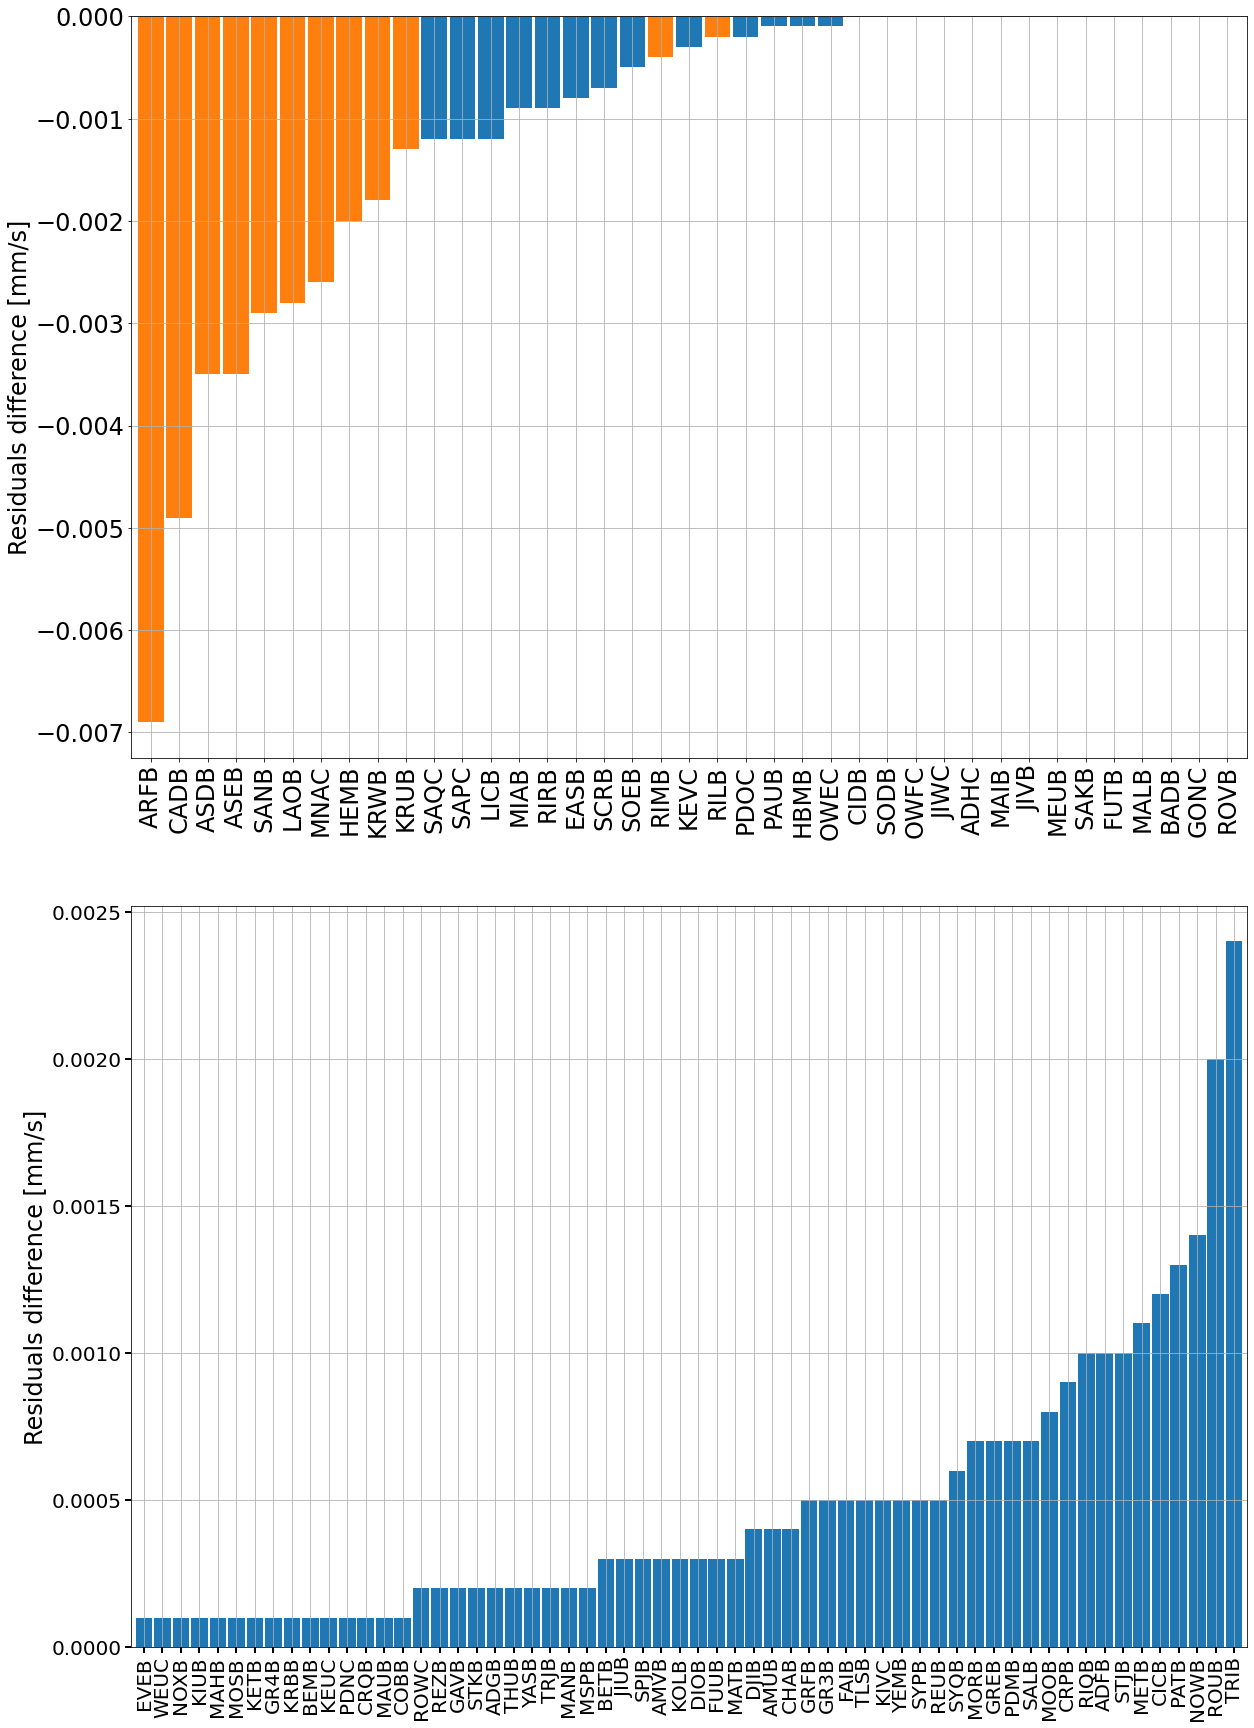

In [16]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 40]
station = np.loadtxt(filename_not2l2,usecols=(0,),dtype=str)

residuals = np.loadtxt(filename_not2l2,usecols=(6,))
residuals_c = np.loadtxt(filename_t2l2,usecols=(6,)) #_c mean corrected data

diff = residuals-residuals_c

df = pd.DataFrame(zip(station,diff),columns=["Station", "Residuals Difference"])
color=[]

#Manual selection of the color
#the XXXX code represents a DORIS station (see https://ids-doris.org)
saa = ['AREA','AREB','ARFB','CACB','CADB','ASDB','ASEB','RIKB','RILB','RIMB','KRUA','KRVB','KRUB','KRWB','SJUC','LAOB','MNAC','SCRC']
for j in df["Station"]:

    if j == 'ARFB':
        color.append('tab:orange') 
    elif j == 'CADB': 
        color.append('tab:orange') 
    elif j == 'ASDB': 
        color.append('tab:orange')
    elif j == 'ASEB': 
        color.append('tab:orange')
    elif j == 'RIKB': 
        color.append('tab:orange')
    elif j == 'RILB': 
        color.append('tab:orange')
    elif j == 'RIMB': 
        color.append('tab:orange') 
    elif j == 'KRUA': 
        color.append('tab:orange')
    elif j == 'KRVB': 
        color.append('tab:orange')
    elif j == 'KRUB': 
        color.append('tab:orange')
    elif j == 'KRWB': 
        color.append('tab:orange')
    elif j == 'SJUC': 
        color.append('tab:orange')
    elif j == 'LAOB': 
        color.append('tab:orange')
    elif j == 'MNAC': 
        color.append('tab:orange')
    elif j == 'SCRC': 
        color.append('tab:orange')
    elif j == 'SANB': 
        color.append('tab:orange')
    elif j == 'HEMB': 
        color.append('tab:orange')
    else:
        color.append('tab:blue') 
df['color']=color
print(df)
dfneg = df.where(df["Residuals Difference"] <= 0).dropna()
dfneg = dfneg.sort_values(by=["Residuals Difference"]).dropna()
dfneg = dfneg.rename(columns={"Station": "Stationneg"})

dfpos = df.where(df["Residuals Difference"] >0).dropna()
dfpos = dfpos.sort_values(by=["Residuals Difference"]).dropna()
dfpos = dfpos.rename(columns={"Station": "Stationpos"})

ax1 = fig.add_subplot(211)
dfneg.plot.bar(x='Stationneg', y='Residuals Difference', rot=90, grid =True,width=0.9,fontsize = 24,legend=False,ax=ax1,color = dfneg['color'])
plt.ylabel('Residuals difference [mm/s]',fontsize = 24)
plt.xlabel('',fontsize = 24)
# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

dfpos.plot.bar(x='Stationpos', y='Residuals Difference', rot=90, grid =True,width=0.9,fontsize = 24,legend=False,ax=ax2,color = dfpos['color'])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize = 20)

plt.ylabel('Residuals difference [mm/s]',fontsize = 24)
plt.xlabel('',fontsize = 24)